In [852]:
import numpy as np
import pandas as pd
import numpy as np
import pickle
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, RobustScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegressionCV, SGDClassifier 
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
import xgboost as xgb
 
%matplotlib inline

In [84]:
def make_confusion_matrix(model, X_local, y_local, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = model.predict(X_local)
    fraud_confusion = confusion_matrix(y_local, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d');
    plt.xlabel('prediction')
    plt.ylabel('actual')

def make_class_report(model, X_local, y_local, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = model.predict(X_local)
    print(classification_report(y_local, y_predict))

In [859]:
df=pd.read_csv('data_topics_eng.csv')

In [860]:
df_or=pd.read_csv('data_topics_eng.csv')

#### Loading the encoder to get journal names 

In [855]:
file = open("label_enc.pkl",'rb')
label_encoder= pickle.load(file)
file.close()

In [861]:
df_or['journal']=label_encoder.inverse_transform(df_or['journal'])

In [857]:
df_or.head()

,title,authers,abstract,type,date_pub,journal,date_added,figuers,full_text,citation,...,a_neu,a_pos,a_compound,t_neg,t_neu,t_pos,t_compound,authers_num,date_days,reads_map
0,Myths about Myths? A Commentary on Thomas (202...,"['Ellen Daly', 'Olivia Smith', 'Hannah Bows[.....",commentary responds claim cheryl thomas show p...,Article,2021.0,Journal of Gender-Based Violence,6d ago,1,1,0,...,0.709,0.000,-0.9413,0.227,0.628,0.145,-0.4019,4,6.0,0
1,A direct observation of pain scale use in five...,"['Laura Jenkins', 'Ruth H Parry', 'Christina F...",assessing pain intensity important palliative ...,Article,2021.0,Patient Education and Counseling,Oct 28,0,0,0,...,0.581,0.188,-0.8506,0.203,0.615,0.182,-0.1779,3,59.0,0
2,The Cold Truth: Art as Fulcrum for Recovery in...,['Eloise Malone'],describes art curating sexually exploited youn...,Article,2017.0,Journal of Social Work Practice,Oct 25,0,1,1,...,0.642,0.313,0.9816,0.000,0.850,0.150,0.3182,1,62.0,0
3,Dispositional Mindfulness Reduces Burnout and ...,"['Denisse Zúñiga', 'Manuel Torres-Sahli', 'Att...",objective many study document high prevalence ...,Article,2021.0,Mindfulness,Oct 21,1,1,0,...,0.701,0.199,0.9300,0.000,0.854,0.146,0.3400,4,66.0,0
4,Realtalk Evidence-Based Communication Training...,"['Ruth H Parry', 'Becky Whittaker', 'Marco Pin...",background communication skill training profes...,Preprint,2021.0,NaN,Oct 14,1,1,0,...,0.819,0.152,0.9648,0.000,1.000,0.000,0.0000,4,73.0,0


In [724]:
df.head()

,title,authers,abstract,type,date_pub,journal,date_added,figuers,full_text,citation,...,a_neg,a_neu,a_pos,a_compound,t_neg,t_neu,t_pos,t_compound,authers_num,date_days
0,Myths about Myths? A Commentary on Thomas (202...,"['Ellen Daly', 'Olivia Smith', 'Hannah Bows[.....",commentary responds claim cheryl thomas show p...,Article,2021.0,313,6d ago,1,1,0,...,0.291,0.709,0.000,-0.9413,0.227,0.628,0.145,-0.4019,4,6.0
1,A direct observation of pain scale use in five...,"['Laura Jenkins', 'Ruth H Parry', 'Christina F...",assessing pain intensity important palliative ...,Article,2021.0,416,Oct 28,0,0,0,...,0.231,0.581,0.188,-0.8506,0.203,0.615,0.182,-0.1779,3,59.0
2,The Cold Truth: Art as Fulcrum for Recovery in...,['Eloise Malone'],describes art curating sexually exploited youn...,Article,2017.0,351,Oct 25,0,1,1,...,0.045,0.642,0.313,0.9816,0.000,0.850,0.150,0.3182,1,62.0
3,Dispositional Mindfulness Reduces Burnout and ...,"['Denisse Zúñiga', 'Manuel Torres-Sahli', 'Att...",objective many study document high prevalence ...,Article,2021.0,382,Oct 21,1,1,0,...,0.100,0.701,0.199,0.9300,0.000,0.854,0.146,0.3400,4,66.0
4,Realtalk Evidence-Based Communication Training...,"['Ruth H Parry', 'Becky Whittaker', 'Marco Pin...",background communication skill training profes...,Preprint,2021.0,569,Oct 14,1,1,0,...,0.029,0.819,0.152,0.9648,0.000,1.000,0.000,0.0000,4,73.0


## map reads

In [725]:
df['reads'].describe()

count    1185.000000
mean       62.479325
std       109.618810
min         0.000000
25%         9.000000
50%        28.000000
75%        65.000000
max       936.000000
Name: reads, dtype: float64

Since the average number of reads is 57, we'll assume that any article that has more than 200 reads is considered popular in social science departments and use that number as a threshold.

In [726]:
def pop(df):
    if df >=200:
        return 1
    else:
        return 0

In [727]:
df[df['reads']==909]

,title,authers,abstract,type,date_pub,journal,date_added,figuers,full_text,citation,...,a_neg,a_neu,a_pos,a_compound,t_neg,t_neu,t_pos,t_compound,authers_num,date_days
179,A global analysis of the impact of COVID-19 st...,"['Amy Nivette', 'Renee Zahnow', 'Raúl Aguilar ...",stay home restriction control spread covid led...,Article,1.0,393,Jun 5,1,1,15,...,0.397,0.585,0.018,-0.9871,0.259,0.741,0.0,-0.5423,4,NaN


In [864]:
df['reads_map'] = df['reads'].apply(pop)

In [865]:
df_or['reads_map'] = df_or['reads'].apply(pop)

In [901]:
df[df['reads']==936]

,title,authers,abstract,type,date_pub,journal,date_added,figuers,full_text,citation,...,a_neu,a_pos,a_compound,t_neg,t_neu,t_pos,t_compound,authers_num,date_days,reads_map
804,The Avoidance and Fusion Questionnaire for You...,"['Vasilis S. Vasiliou', 'Maria Koushiou', 'Mar...",current study evaluates whether avoidance fusi...,Poster,1.0,569,Aug 1,0,1,1,...,0.884,0.096,0.8519,0.197,0.803,0.0,-0.4019,4,138.0,1


In [866]:
def fill_na(df):
    col=df.columns
    df_filled=pd.DataFrame(columns=col)
    for c in col:
        if(df[c].dtypes == object):
            df_filled[c]= df[c].fillna(df[c].mode()[0])    
        elif (df[c].dtypes ==float or df[c].dtypes ==int):
            df_filled[c]= df[c].fillna(df[c].median())
            
    return df_filled

In [867]:
df=fill_na(df)

In [868]:
df_or=fill_na(df_or)

/Users/workplace/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='reads_map', ylabel='count'>

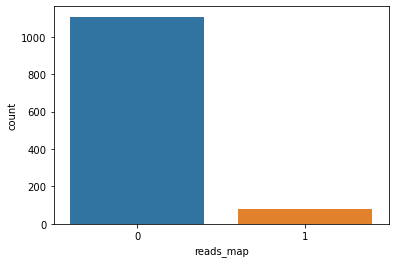

In [869]:
sns.countplot(df['reads_map'] )

# EDA On Popular Articles 

In [895]:
sns.set(rc = {'figure.figsize':(20,10)})


In [899]:
df_or[df_or['reads_map']==1]['reads'].describe()

count     78.000000
mean     398.628205
std      196.507170
min      200.000000
25%      233.000000
50%      323.000000
75%      528.250000
max      936.000000
Name: reads, dtype: float64

In [905]:
df_or[df_or['reads_map']==1][['a_neg', 'a_neu', 'a_pos', 'a_compound','t_neg', 't_neu', 't_pos', 't_compound']].describe()

,a_neg,a_neu,a_pos,a_compound,t_neg,t_neu,t_pos,t_compound
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,0.095872,0.764897,0.139218,0.280731,0.054769,0.875154,0.070077,0.021903
std,0.109482,0.134149,0.099639,0.729434,0.111161,0.162630,0.125772,0.357434
min,0.000000,0.401000,0.000000,-0.993900,0.000000,0.324000,0.000000,-0.893400
25%,0.019250,0.663500,0.075250,-0.220300,0.000000,0.758000,0.000000,0.000000
50%,0.054000,0.789500,0.123000,0.599150,0.000000,1.000000,0.000000,0.000000
75%,0.116750,0.865250,0.198500,0.918025,0.000000,1.000000,0.131750,0.000000
max,0.500000,1.000000,0.500000,0.995900,0.451000,1.000000,0.521000,0.765000


<AxesSubplot:>

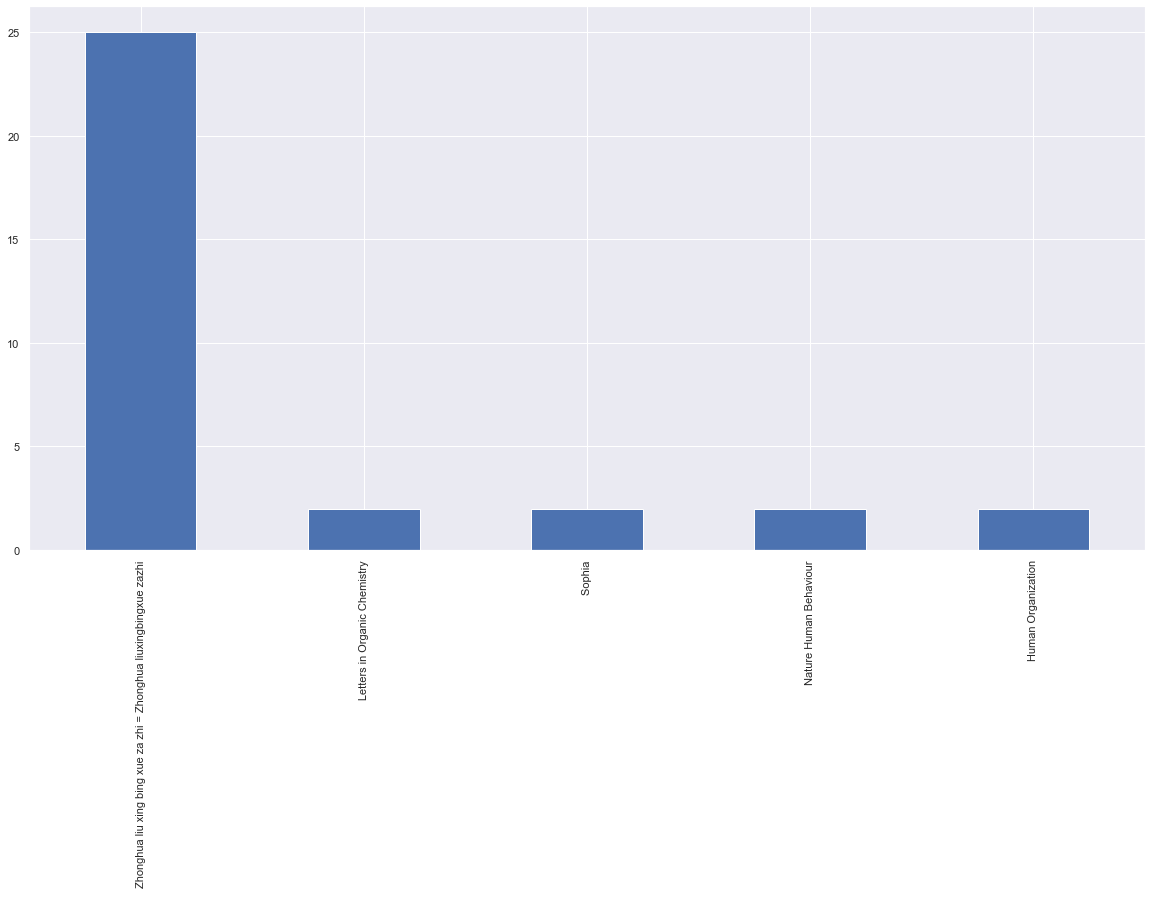

In [896]:
df_or[df_or['reads_map']==1]['journal'].value_counts().head(5).plot(kind = 'bar')

<AxesSubplot:ylabel='main_topic2'>

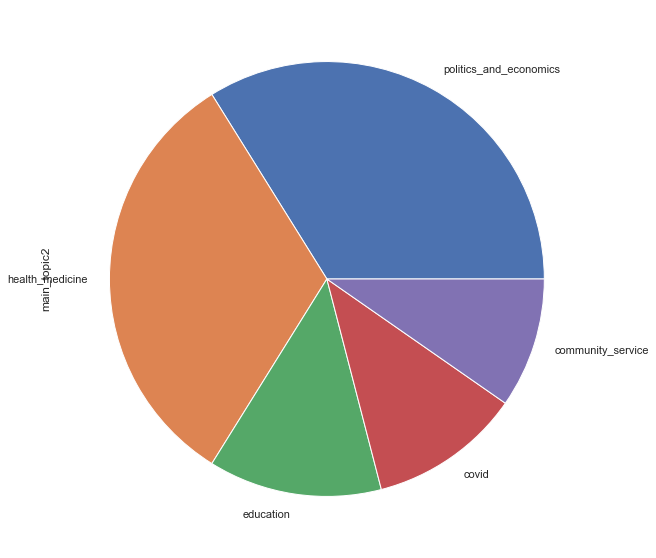

In [897]:
df_or[df_or['reads_map']==1]['main_topic2'].value_counts().head(5).plot(kind = 'pie')

<AxesSubplot:>

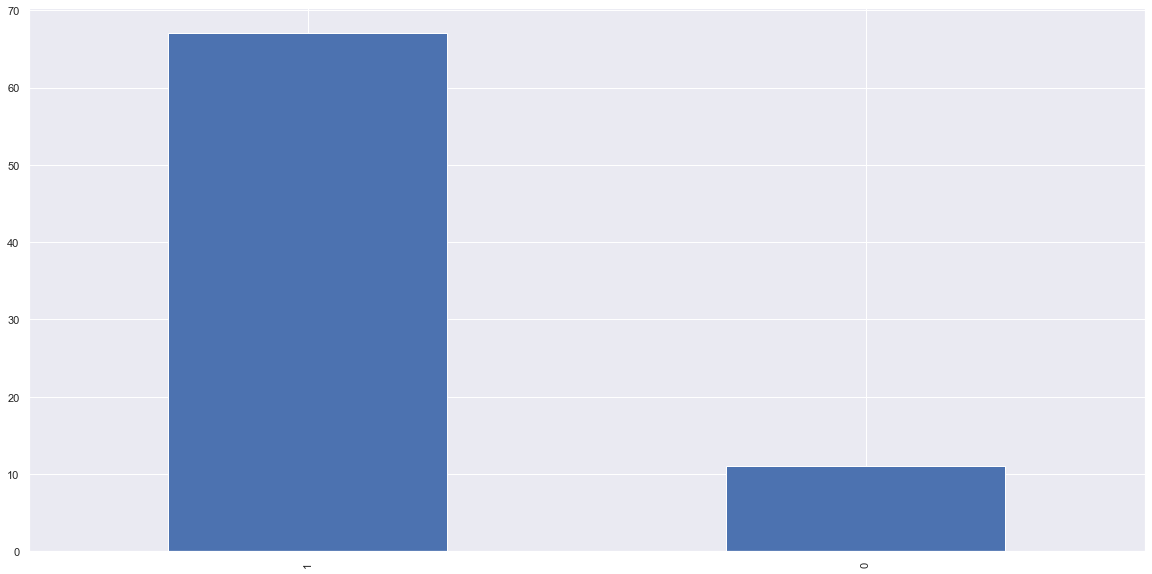

In [906]:
df_or[df_or['reads_map']==1]['full_text'].value_counts().head(5).plot(kind = 'bar')

<AxesSubplot:>

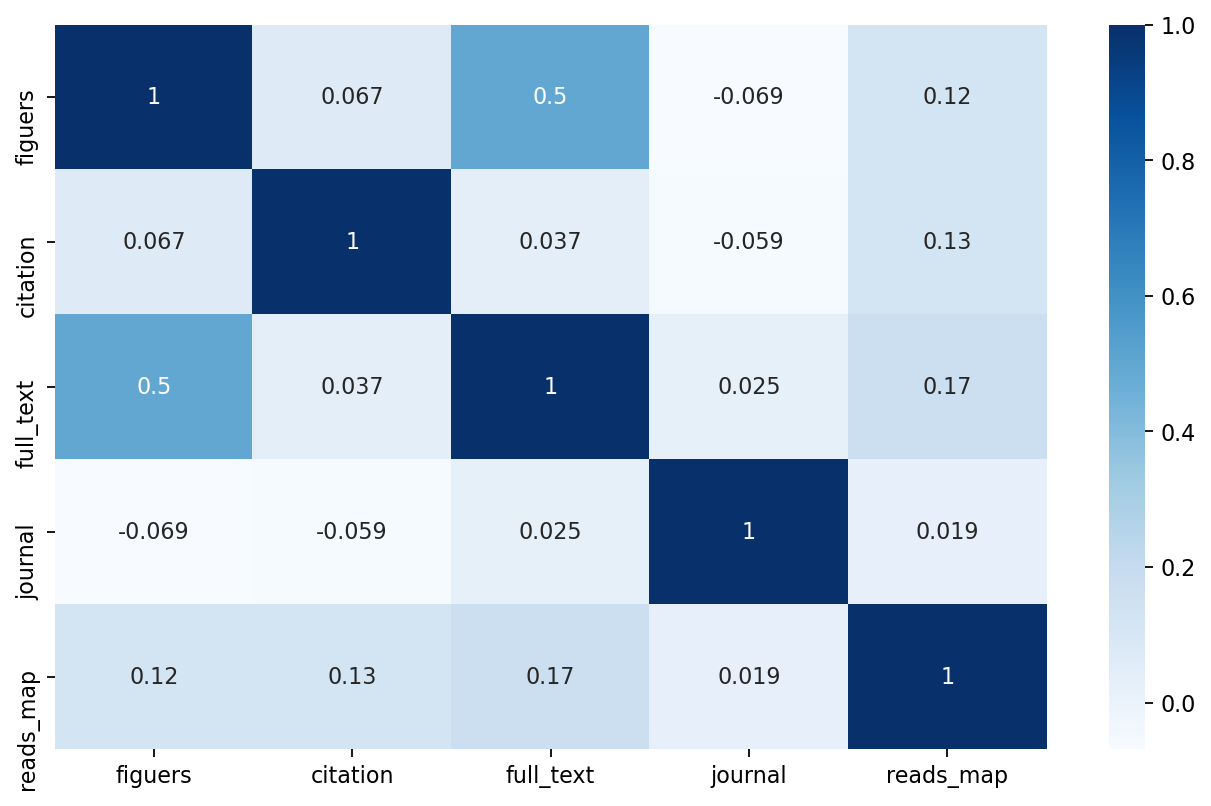

In [735]:
plt.figure(figsize=(10,6), dpi=160)
sns.heatmap(df_or[['figuers','citation','full_text','journal','type','reads_map']].corr(),annot=True,cmap="Blues")

# Baseline 

In [736]:
Xor = df_or.drop(['reads_map','reads'],axis=1)
yor = df_or['reads_map']

In [737]:
num_list = ['figuers','full_text']
cat_list = ['type']

In [738]:
"""num_list = Xor.select_dtypes(include=np.number).columns
cat_list = Xor.select_dtypes(exclude=np.number).columns"""

'num_list = Xor.select_dtypes(include=np.number).columns\ncat_list = Xor.select_dtypes(exclude=np.number).columns'

### Numerical Only 

In [739]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(Xor[num_list], yor, test_size=0.2, random_state=22)
X_train1, X_val1, y_train1, y_val1 = train_test_split(X_train1, y_train1, test_size=0.2, random_state=22)



In [740]:
X_train1

,figuers,full_text
105,0,1
619,1,1
1147,0,1
693,0,0
920,0,1
...,...,...
1109,0,1
1110,0,0
223,1,1
1108,0,0


In [741]:
lr_bl = LogisticRegression(max_iter=2000,random_state=100)

In [742]:
lr_bl.fit(X_train1,y_train1)
lr_bl.score(X_train1,y_train1)

0.9300791556728232

In [743]:
lr_bl.score(X_val1,y_val1)

0.9578947368421052

In [744]:
make_class_report(lr_bl,X_train1,y_train1)

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       705
           1       0.00      0.00      0.00        53

    accuracy                           0.93       758
   macro avg       0.47      0.50      0.48       758
weighted avg       0.87      0.93      0.90       758



/Users/workplace/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/workplace/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/workplace/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [745]:
make_class_report(lr_bl,X_val1, y_val1)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       182
           1       0.00      0.00      0.00         8

    accuracy                           0.96       190
   macro avg       0.48      0.50      0.49       190
weighted avg       0.92      0.96      0.94       190



/Users/workplace/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/workplace/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/workplace/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## ALL Feauters 

In [746]:

dummy_Xor=pd.get_dummies(Xor[num_list + cat_list ],drop_first=True)

In [747]:
dummy_Xor

,figuers,full_text,type_Book,type_Chapter,type_Conference Paper,type_Data,type_Experiment Findings,type_Literature Review,type_Poster,type_Preprint,type_Presentation,type_Research,type_Research Proposal,type_Technical Report,type_Thesis
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1181,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1182,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1183,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0


In [748]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(dummy_Xor, yor, test_size=0.2, random_state=22)
X_train2, X_val2, y_train2, y_val2 = train_test_split(X_train2, y_train2, test_size=0.2, random_state=22)




In [749]:
lr_bl.fit(X_train2,y_train2)
lr_bl.score(X_train2,y_train2)

0.9300791556728232

In [750]:
lr_bl.score(X_val2,y_val2)

0.9578947368421052

In [751]:
make_class_report(lr_bl,X_val2, y_val2)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       182
           1       0.00      0.00      0.00         8

    accuracy                           0.96       190
   macro avg       0.48      0.50      0.49       190
weighted avg       0.92      0.96      0.94       190



/Users/workplace/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/workplace/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/workplace/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Balanced 

Class=0, n=1107 (45.991%)
Class=1, n=1300 (54.009%)


/Users/workplace/opt/anaconda3/lib/python3.8/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (1330) in class 0 will be larger than the number of samples in the majority class (class #0 -> 1107)
  warnings.warn(
/Users/workplace/opt/anaconda3/lib/python3.8/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (1300) in class 1 will be larger than the number of samples in the majority class (class #0 -> 1107)
  warnings.warn(


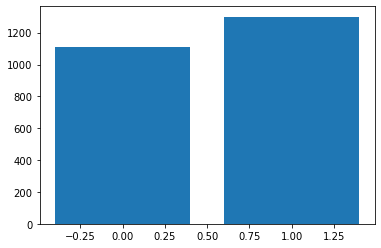

In [752]:
###### borderline-SMOTE for imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import BorderlineSMOTE
from matplotlib import pyplot
from numpy import where

# define dataset
strategy = {0:1330, 1:1300}
oversample = BorderlineSMOTE(sampling_strategy=strategy)
X3, y3 = oversample.fit_resample(dummy_Xor, yor)
# summarize distribution
counter = Counter(y3)
for k,v in counter.items():
	per = v / len(y3) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [753]:
X_train3, X_test3, y_train3, y_test3= train_test_split(X3, y3, test_size=0.2, random_state=22)
X_train3, X_val3, y_train3, y_val3 = train_test_split(X_train3, y_train3, test_size=0.2, random_state=22)





In [754]:
lr_bl.fit(X_train3,y_train3)
lr_bl.score(X_train3,y_train3)

0.7844155844155845

In [755]:
lr_bl.score(X_val3,y_val3)

0.7974025974025974

In [756]:
make_class_report(lr_bl,X_val3, y_val3)

              precision    recall  f1-score   support

           0       0.94      0.60      0.73       178
           1       0.74      0.97      0.84       207

    accuracy                           0.80       385
   macro avg       0.84      0.78      0.78       385
weighted avg       0.83      0.80      0.79       385



In [757]:
make_class_report(lr_bl,X_test3, y_test3)

              precision    recall  f1-score   support

           0       0.91      0.58      0.71       221
           1       0.73      0.95      0.83       261

    accuracy                           0.78       482
   macro avg       0.82      0.77      0.77       482
weighted avg       0.81      0.78      0.77       482



## After Engineering 

In [765]:
X = df.drop(['reads_map','reads','abstract','main_topic',"date_pub",'title','authers','or_abt','topic_dist2','topic_dist','main_topic_cx','topic_dist_cx','abstract_sent','title_sent','date_added','interest','citation'],axis=1)
y = df['reads_map']

In [766]:
X 

,type,journal,figuers,full_text,main_topic2,politics_and_economics,sexuality,covid,women,criminology,...,a_neg,a_neu,a_pos,a_compound,t_neg,t_neu,t_pos,t_compound,authers_num,date_days
0,Article,313,1,1,politics_and_economics,0.018422,0.011069,0.000000,0.000000,0.008648,...,0.291,0.709,0.000,-0.9413,0.227,0.628,0.145,-0.4019,4,6.0
1,Article,416,0,0,community_service,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.231,0.581,0.188,-0.8506,0.203,0.615,0.182,-0.1779,3,59.0
2,Article,351,0,1,community_service,0.008318,0.000000,0.000000,0.000000,0.002732,...,0.045,0.642,0.313,0.9816,0.000,0.850,0.150,0.3182,1,62.0
3,Article,382,1,1,education,0.000000,0.000000,0.053811,0.000000,0.001198,...,0.100,0.701,0.199,0.9300,0.000,0.854,0.146,0.3400,4,66.0
4,Preprint,569,1,1,community_service,0.000000,0.000000,0.000000,0.000000,0.022442,...,0.029,0.819,0.152,0.9648,0.000,1.000,0.000,0.0000,4,73.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180,Article,360,1,1,politics_and_economics,0.080479,0.000000,0.000000,0.000000,0.000000,...,0.088,0.692,0.221,0.9643,0.000,0.791,0.209,0.4404,2,138.0
1181,Chapter,569,0,0,health_medicine,0.011669,0.000000,0.002288,0.001974,0.001898,...,0.115,0.842,0.043,-0.9016,0.000,1.000,0.000,0.0000,1,138.0
1182,Article,392,0,0,health_medicine,0.000000,0.000000,0.000000,0.020797,0.000000,...,0.031,0.924,0.046,0.1027,0.000,1.000,0.000,0.0000,4,138.0
1183,Chapter,569,1,1,politics_and_economics,0.052179,0.012575,0.000000,0.000000,0.000000,...,0.000,1.000,0.000,0.0000,0.000,1.000,0.000,0.0000,2,138.0


In [767]:
dummy_X=pd.get_dummies(X,drop_first=True)

In [768]:
X_train, X_val, y_train, y_val = train_test_split(dummy_X, y, test_size=0.2, random_state=13)



In [769]:
lr = LogisticRegression(max_iter=2000,random_state=100)

In [770]:
lr.fit(X_train,y_train)
y_pred = lr.predict(X_train)
lr.score(X_train,y_train)

0.9282700421940928

In [771]:
lr.score(X_val,y_val)

0.9578059071729957

In [772]:
make_class_report(lr,X_val, y_val)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       227
           1       0.00      0.00      0.00        10

    accuracy                           0.96       237
   macro avg       0.48      0.50      0.49       237
weighted avg       0.92      0.96      0.94       237



/Users/workplace/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/workplace/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/workplace/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Balanceing the data 

In [773]:
df['reads_map'].value_counts()

0    1107
1      78
Name: reads_map, dtype: int64

Class=0, n=1107 (45.991%)
Class=1, n=1300 (54.009%)


/Users/workplace/opt/anaconda3/lib/python3.8/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (1330) in class 0 will be larger than the number of samples in the majority class (class #0 -> 1107)
  warnings.warn(
/Users/workplace/opt/anaconda3/lib/python3.8/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (1300) in class 1 will be larger than the number of samples in the majority class (class #0 -> 1107)
  warnings.warn(


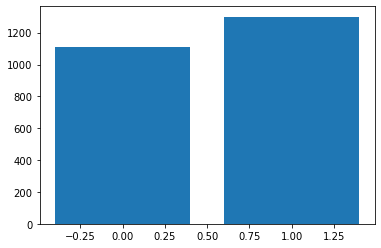

In [774]:
###### borderline-SMOTE for imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import BorderlineSMOTE
from matplotlib import pyplot
from numpy import where

# define dataset
strategy = {0:1330, 1:1300}
oversample = BorderlineSMOTE(sampling_strategy=strategy)
X2, y2 = oversample.fit_resample(dummy_X, y)
# summarize distribution
counter = Counter(y2)
for k,v in counter.items():
	per = v / len(y2) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [775]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X2, y2, test_size=0.2, random_state=25)
X_train4, X_val4, y_train4, y_val4 = train_test_split(X_train4, y_train4, test_size=0.2, random_state=20)



lr = LogisticRegression(max_iter=2000,random_state=100)

In [776]:
lr.fit(X_train4,y_train4)
y_pred = lr.predict(X_train4)
lr.score(X_train4,y_train4)

/Users/workplace/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8863636363636364

In [777]:
lr.score(X_val4,y_val4)

0.8623376623376623

In [778]:
lr.score(X_test4,y_test4)

0.9004149377593361

In [779]:
make_class_report(lr,X_train4, y_train4)

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       707
           1       0.93      0.86      0.89       833

    accuracy                           0.89      1540
   macro avg       0.89      0.89      0.89      1540
weighted avg       0.89      0.89      0.89      1540



In [780]:
make_class_report(lr,X_val4, y_val4)

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       185
           1       0.88      0.85      0.87       200

    accuracy                           0.86       385
   macro avg       0.86      0.86      0.86       385
weighted avg       0.86      0.86      0.86       385



## 

In [781]:
make_class_report(lr,X_test4, y_test4)

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       215
           1       0.93      0.89      0.91       267

    accuracy                           0.90       482
   macro avg       0.90      0.90      0.90       482
weighted avg       0.90      0.90      0.90       482



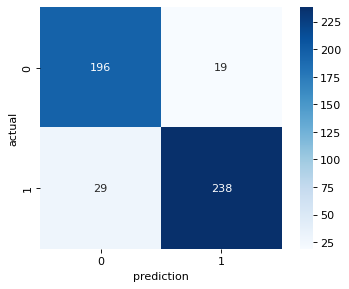

In [782]:
make_confusion_matrix(lr,X_test4, y_test4, 0.5)

# Clustring 

In [783]:
X_train4.columns

Index(['journal', 'figuers', 'full_text', 'politics_and_economics',
       'sexuality', 'covid', 'women', 'criminology', 'education',
       'health_medicine', 'child_family', 'community_service', 't_length_w',
       'a_length_s', 'a_length_w', 'a_neg', 'a_neu', 'a_pos', 'a_compound',
       't_neg', 't_neu', 't_pos', 't_compound', 'authers_num', 'date_days',
       'type_Book', 'type_Chapter', 'type_Conference Paper', 'type_Data',
       'type_Experiment Findings', 'type_Literature Review', 'type_Poster',
       'type_Preprint', 'type_Presentation', 'type_Research',
       'type_Research Proposal', 'type_Technical Report', 'type_Thesis',
       'main_topic2_community_service', 'main_topic2_covid',
       'main_topic2_criminology', 'main_topic2_education',
       'main_topic2_health_medicine', 'main_topic2_politics_and_economics',
       'main_topic2_sexuality', 'main_topic2_women'],
      dtype='object')

In [823]:
Xkm=dummy_X

In [824]:
Xkm['pop']=y

In [825]:
Xkm= Xkm[Xkm['pop']==1]

In [826]:
or_features=['figuers','full_text','date_days','authers_num','politics_and_economics',
       'sexuality', 'covid', 'women', 'criminology', 'education',
       'health_medicine', 'child_family', 'community_service',
       'main_topic2_community_service', 'main_topic2_covid',
       'main_topic2_criminology', 'main_topic2_education',
       'main_topic2_health_medicine', 'main_topic2_politics_and_economics',
       'main_topic2_sexuality', 'main_topic2_women']
Xkm=Xkm[or_features]

In [827]:
ss = StandardScaler()
X_std = ss.fit_transform(Xkm)


In [828]:
inertia_list = []
sil_list = []
k_list = []
for k in range(2, 15):
    km = KMeans(n_clusters = k, random_state=42)
    cluster_labels = km.fit_predict(X_std)
    k_list.append(k)
    inertia_list.append(km.inertia_)
    
    sil_avg = silhouette_score(X_std, cluster_labels)
    sil_list.append(sil_avg)
    
    

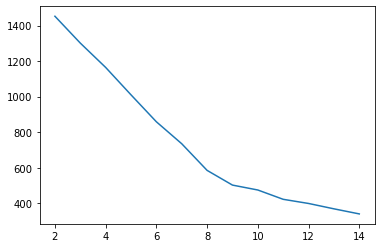

In [829]:
plt.plot(k_list, inertia_list)

In [830]:
for k, sil in zip(k_list, sil_list):
    print(k, sil)

2 0.1278142106319098
3 0.14067763028627547
4 0.18877383537359047
5 0.22421732516946796
6 0.2787911196173054
7 0.295298879562865
8 0.35161560621765797
9 0.3847085090705864
10 0.3721106816279961
11 0.3602779794418235
12 0.34933386257808163
13 0.3580003749251
14 0.35590922098997796


In [831]:
dfkm= df[df['reads_map']==1]

In [832]:
km = KMeans(n_clusters = 9, random_state=42)
cluster_labels = km.fit_predict(X_std)
dfkm["cluster"] = cluster_labels

<ipython-input-832-4c48fdc75c87>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfkm["cluster"] = cluster_labels


/Users/workplace/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cluster', ylabel='count'>

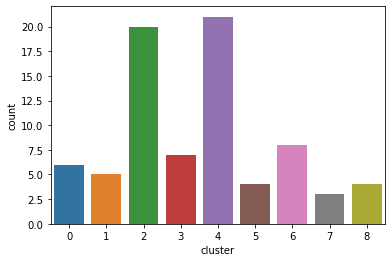

In [833]:
sns.countplot(dfkm['cluster'])

In [854]:
analysis_feauters=['figuers','full_text','authers_num','politics_and_economics',
       'sexuality', 'covid', 'women', 'criminology', 'education',
       'health_medicine', 'child_family', 'community_service']

In [850]:
dfkm[dfkm['journal']==569]

,title,authers,abstract,type,date_pub,journal,date_added,figuers,full_text,citation,...,a_pos,a_compound,t_neg,t_neu,t_pos,t_compound,authers_num,date_days,reads_map,cluster
61,"Introduction: Social Media, Politics and Democ...","['Pawel Surowiec', 'Václav Štětka']",level democratisation among state discussed vo...,Chapter,2018.0,569,Aug 1,1,1,2,...,0.000,0.0000,0.000,1.000,0.000,0.0000,2,138.0,1,2
105,Voices from the Past: Economic and Political V...,"['Klaus Armingeon', 'Caroline de la Porte', 'E...",show next generation eu ngeu mainly response e...,Preprint,1.0,569,Aug 31,0,1,0,...,0.180,-0.8878,0.071,0.929,0.000,-0.1531,4,117.0,1,3
197,Mohajir militancy in Pakistan: Violence and tr...,['Nichola Khan'],synthesizing political anthropological psychol...,Article,1.0,569,Oct 25,0,1,32,...,0.076,-0.9873,0.416,0.584,0.000,-0.7506,1,62.0,1,4
201,CO-CONSTRUCTED TRANSNATIONAL LEARNING IN POSTG...,"['Rachel Martin', 'Mark Price']",considers challenge affordances relating shift...,Article,1.0,569,Oct 21,0,1,0,...,0.086,0.7506,0.000,0.784,0.216,0.5106,2,66.0,1,6
331,"“It’s being a part of a grand tradition, a gra...","['Monique Botha', 'Bridget Dibb', 'David M Fro...",autistic people report greater comfort sociali...,Preprint,1.0,569,Apr 26,0,1,1,...,0.205,0.9442,0.000,0.714,0.286,0.7184,3,244.0,1,0
418,Investigating public space exploration interes...,"['Marta Entradas', 'Steven Miller']",despite recent report stressing uk play full r...,Article,1.0,569,Aug 20,0,0,0,...,0.301,0.9902,0.000,0.479,0.521,0.7650,2,128.0,1,4
535,Environmental Movements in Asia,['Fengshi Wu'],central inquiry relationship political liberal...,Preprint,1.0,569,Aug 1,1,1,0,...,0.020,0.0772,0.000,1.000,0.000,0.0000,1,138.0,1,4
536,"""I need you all to understand how pervasive th...","['Michael Salter', 'Elly Hanson']",examines phenomenon internet user attempting r...,Chapter,1.0,569,Aug 1,0,1,1,...,0.211,-0.2023,0.142,0.858,0.000,-0.5106,2,138.0,1,8
637,Child-centred Framing Through Design Research:...,"['Cara Shaw', 'Francesca Bernardi', 'Farnaz Ni...",preprint considers possibility analysing child...,Article,1.0,569,Aug 4,1,1,0,...,0.126,0.9201,0.000,1.000,0.000,0.0000,3,138.0,1,8
651,"Variety, Palatability, and Obesity","['Fiona Johnson', 'Jane Wardle']",among key characteristic western obesogenic fo...,Literature Review,1.0,569,Aug 1,0,1,68,...,0.254,0.9753,0.000,1.000,0.000,0.0000,2,138.0,1,2


In [858]:
dfkm.to_csv('data_clustred.csv', index=False)